# Data Analysis and Visualization for Mildew Detection in Cherry Leaves

# Objectives

Business Requirements # 1 - The client wants to carry out a research to visually distinguish between a cherry leaf that has powdery mildew and one that is healthy.

# Input Data:
- /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/train
- /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/test
- /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/validation

# Output Data:
1. Serialize image dimensions (pickle file).
2. Visualize average images and variability per class.
3. Graphically represent differences between healthy and infected leaves.
4. Code for Streamlit image montage.

In [57]:
# Import Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
import matplotlib.colors as colors

sns.set_style("whitegrid")

In [58]:
# Defining Data Paths

base_directory = '/workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves'
train_path = os.path.join(base_directory, 'train')
validation_path = os.path.join(base_directory, 'validation')
test_path = os.path.join(base_directory, 'test')

print(f"Base Directory: {base_directory}")
print(f"Train Path: {train_path}")
print(f"Validation Path: {validation_path}")
print(f"Test Path: {test_path}")

Base Directory: /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves
Train Path: /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/train
Validation Path: /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/validation
Test Path: /workspaces/mildew-detection-in-cherry-leaves/data/cherry-leaves/test


In [59]:
# Setting Output Directory
version = 'v1'
# Get the root directory of the project
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Create the output path within the root directory
output_path = os.path.join(root_dir, 'outputs', version)
os.makedirs(output_path, exist_ok=True)

print(f"Root Directory: {root_dir}")
print(f"Output Path: {output_path}")

Root Directory: /workspaces/mildew-detection-in-cherry-leaves
Output Path: /workspaces/mildew-detection-in-cherry-leaves/outputs/v1


In [60]:
# Identifying Classes
classes = os.listdir(train_path)
print("Classes: ", classes)

Classes:  ['powdery_mildew', 'healthy']


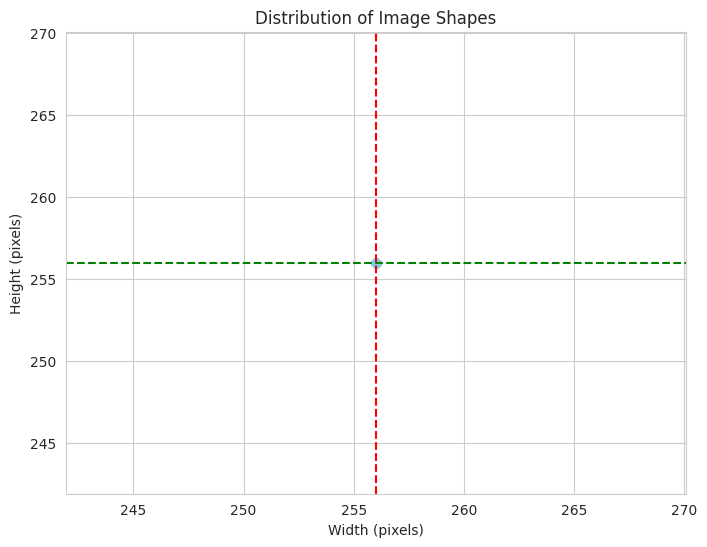

Average width: 256, Average height: 256


['/workspaces/mildew-detection-in-cherry-leaves/outputs/v1/image_shape.pkl']

In [61]:
# Analyzing Image Shapes
heights, widths = [], []
for cls in classes:
    for file in os.listdir(os.path.join(train_path, cls)):
        img = imread(os.path.join(train_path, cls, file))
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)

plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.6, color='skyblue')
average_width = int(np.mean(widths))
average_height = int(np.mean(heights))
plt.axvline(x=average_width, color='red', linestyle='--')
plt.axhline(y=average_height, color='green', linestyle='--')
plt.title('Distribution of Image Shapes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.savefig(os.path.join(output_path, 'image_shape_distribution.png'))
plt.show()

print(f"Average width: {average_width}, Average height: {average_height}")

image_shape = (average_height, average_width, 3)
joblib.dump(image_shape, os.path.join(output_path, 'image_shape.pkl'))

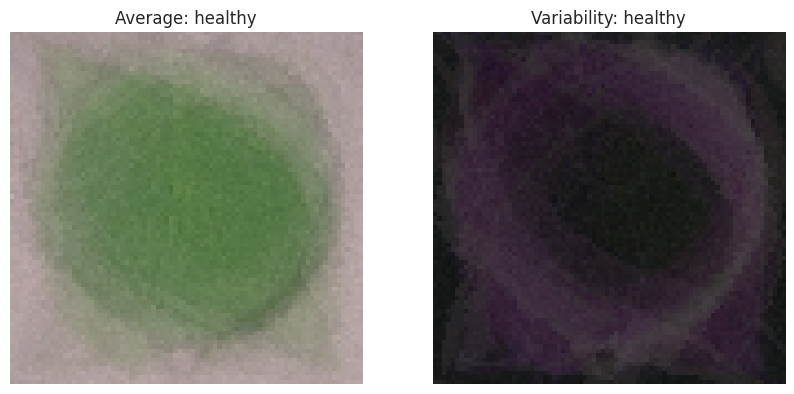

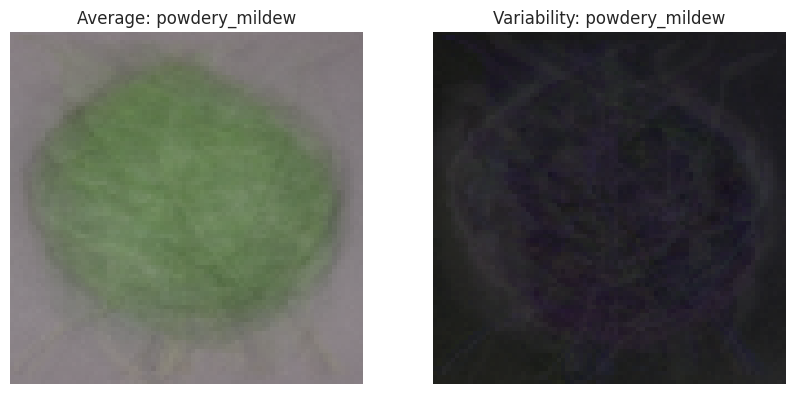

In [62]:
# Visualizing Average Images and Variability
def load_images_as_array(directory, new_size=(80, 80), num_images=25):
    X, y = [], []
    for cls in classes:
        loaded = 0
        for file in os.listdir(os.path.join(directory, cls)):
            if loaded < num_images:
                img = image.load_img(os.path.join(directory, cls, file), target_size=new_size)
                img_array = image.img_to_array(img) / 255.0
                X.append(img_array)
                y.append(cls)
                loaded += 1
    return np.array(X), np.array(y)

X_train, y_train = load_images_as_array(train_path)

def display_average_and_variability(X, y, output_path):
    for cls in np.unique(y):
        class_images = X[y == cls]
        average_image = np.mean(class_images, axis=0)
        variability_image = np.std(class_images, axis=0)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Display average image without grid
        axes[0].imshow(average_image)
        axes[0].set_title(f'Average: {cls}')
        axes[0].axis('off')  # Turn off axes and grid

        # Display variability image without grid
        axes[1].imshow(variability_image)
        axes[1].set_title(f'Variability: {cls}')
        axes[1].axis('off')  # Turn off axes and grid

        plt.savefig(os.path.join(output_path, f'average_variability_{cls}.png'))
        plt.show()

display_average_and_variability(X_train, y_train, output_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


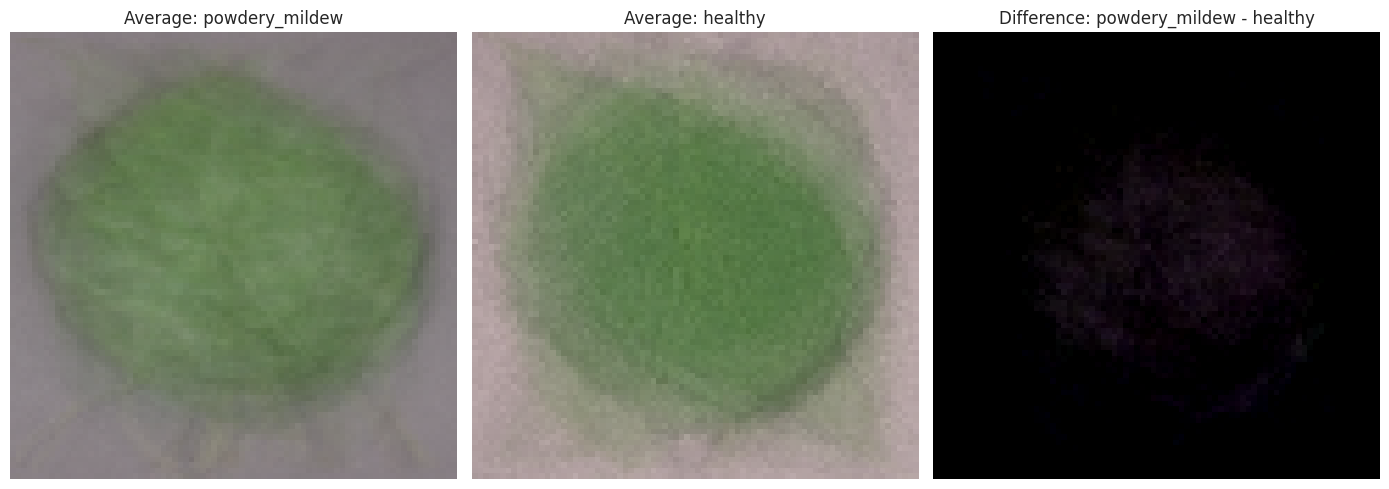

In [63]:
# Visualizing Differences Between Classes

def visualize_class_differences(X, y, class1, class2, output_path, figsize=(20, 5)):
    """
    Visualizes the average images and their difference for two specified classes.
    """

    if class1 not in np.unique(y) or class2 not in np.unique(y):
        print(f"Error: Either '{class1}' or '{class2}' is not a valid class.")
        return

    # Separate images based on class labels
    images_class1 = X[y == class1]
    images_class2 = X[y == class2]

    # Calculate average images
    avg_image_class1 = np.mean(images_class1, axis=0)
    avg_image_class2 = np.mean(images_class2, axis=0)

    # Calculate the difference between the average images
    difference_image = avg_image_class1 - avg_image_class2

    # Create subplots for visualization
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)

    # Display the average images and the difference image
    axes[0].imshow(avg_image_class1, cmap='gray')
    axes[0].set_title(f'Average: {class1}')
    axes[0].axis('off')  # Hide axis

    axes[1].imshow(avg_image_class2, cmap='gray')
    axes[1].set_title(f'Average: {class2}')
    axes[1].axis('off')  # Hide axis

    axes[2].imshow(difference_image, cmap='gray')
    axes[2].set_title(f'Difference: {class1} - {class2}')
    axes[2].axis('off')  # Hide axis

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'class_differences_{class1}_{class2}.png'), bbox_inches='tight', dpi=150)
    plt.show()

# Example usage:
visualize_class_differences(X_train, y_train, classes[0], classes[1], output_path, figsize=(14, 10))

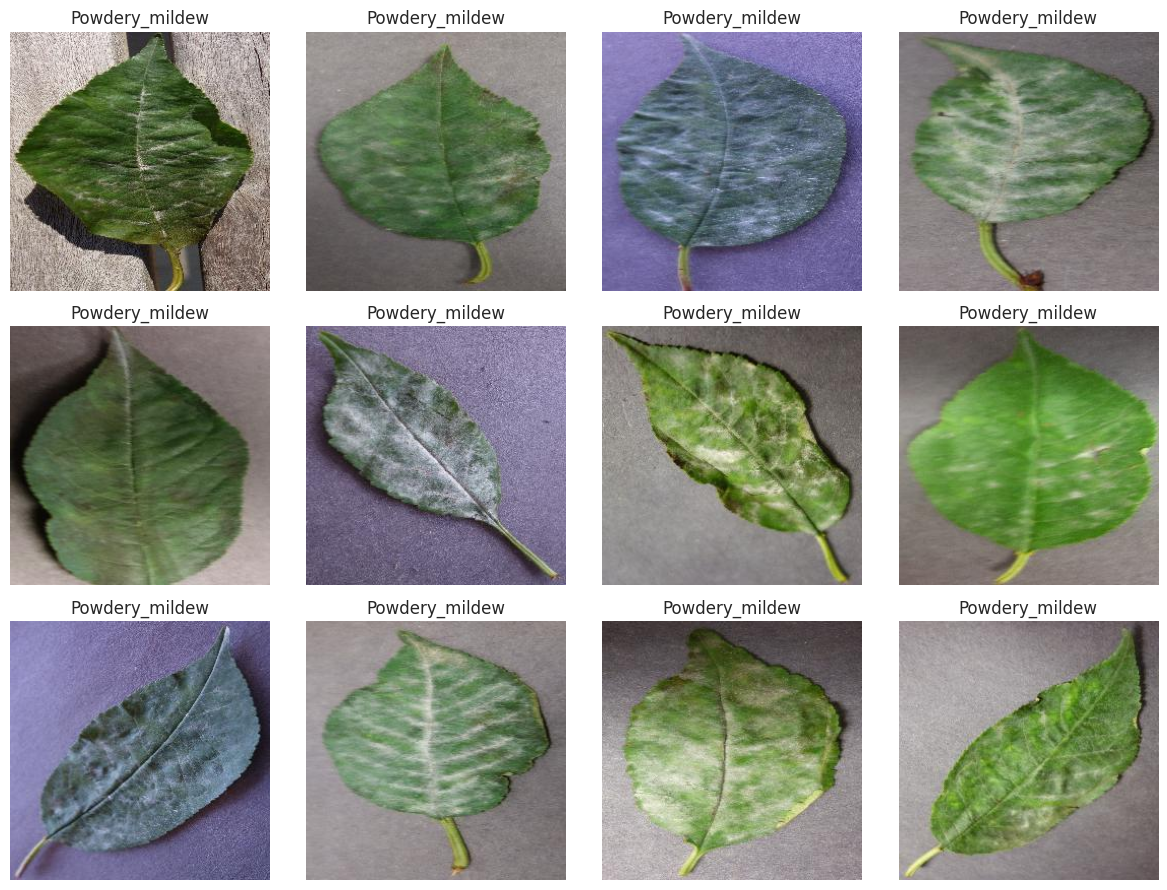

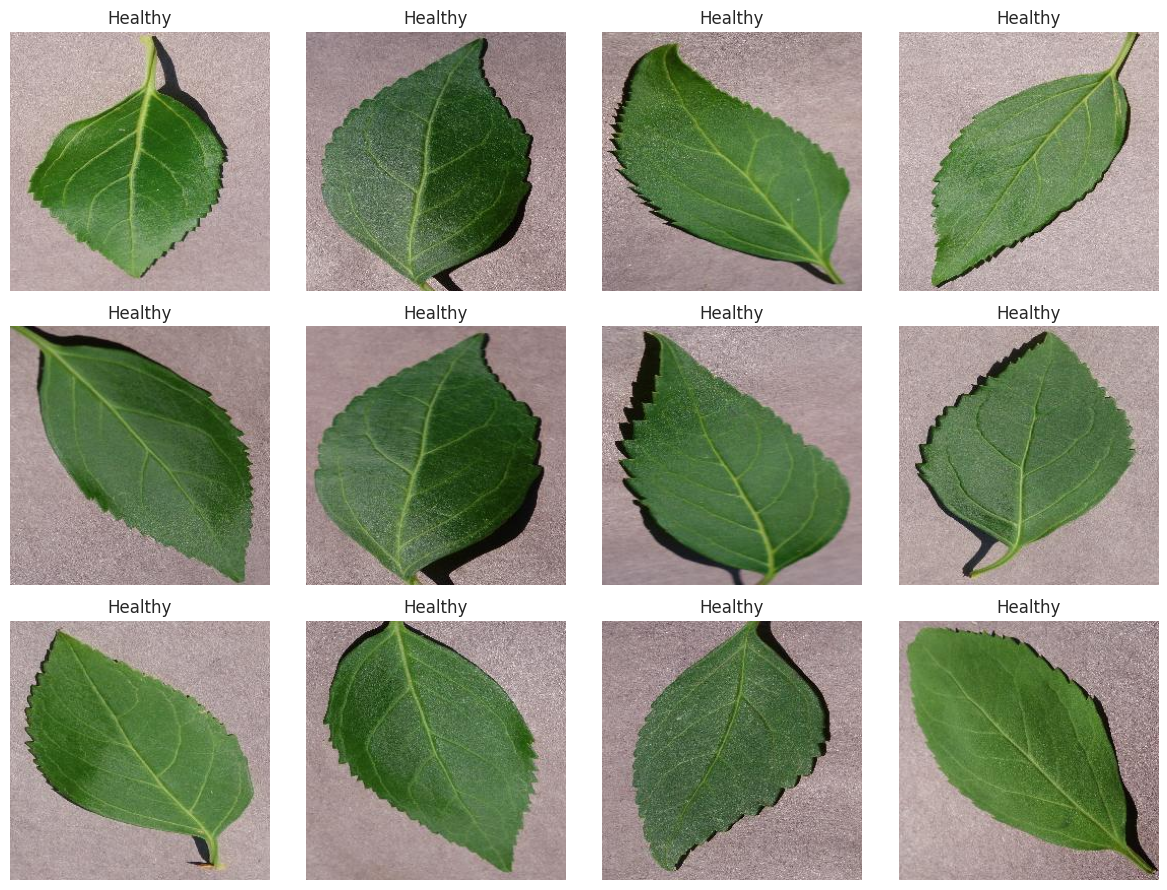

In [64]:
# Image Montage
import random

def create_montage(directory, cls, rows=3, columns=4):
    class_path = os.path.join(directory, cls)
    files = os.listdir(class_path)
    random_files = random.sample(files, min(rows * columns, len(files)))

    fig, axes = plt.subplots(rows, columns, figsize=(12, 9))
    axes = axes.flatten()

    for i, file in enumerate(random_files):
        img = imread(os.path.join(class_path, file))
        axes[i].imshow(img)
        axes[i].set_title(cls.capitalize())
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

for cls in classes:
    create_montage(train_path, cls)

## Conclusions and Next Steps

* **Image Dimension Analysis:** Image dimensions were analyzed and saved for model input configuration.
* **Average Image and Variability Visualization:** Average images and variability were visualized, revealing class characteristics. Average images highlight clear visual differences between healthy and infected leaves (e.g., color changes). Variability within classes emphasizes the diversity of leaf appearances.
* **Difference Visualization:** Differences between healthy and infected leaves were visualized, highlighting areas of greatest change (e.g., concentration of differences at leaf edges).
* **Image Montage:** Image montage functionality was implemented for interactive data exploration within the Streamlit application.

### Next Steps

* Proceed with model training for mildew detection.
* Evaluate and refine the model to optimize accuracy.
* Integrate visualizations into the Streamlit application.
* Perform further analysis and data augmentation as needed.